In [1]:
from tyxe_runfiles import train, eval, generate
from modules.config import read_config
import modules.plots as plots
import torch
import numpy as np
import os

/Home/siv31/tak011/.conda/envs/master/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BASE_DIR = "./tests/pipeline-test"
PROFILE = "sin-10x"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

In [4]:
config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]

config["DEVICE"] = "cuda:7"

In [5]:
GENERATE = True
TRAIN = True
EVAL = True

IS_ONE_DIM = False

====== Generating profile sin-10x-100k ======


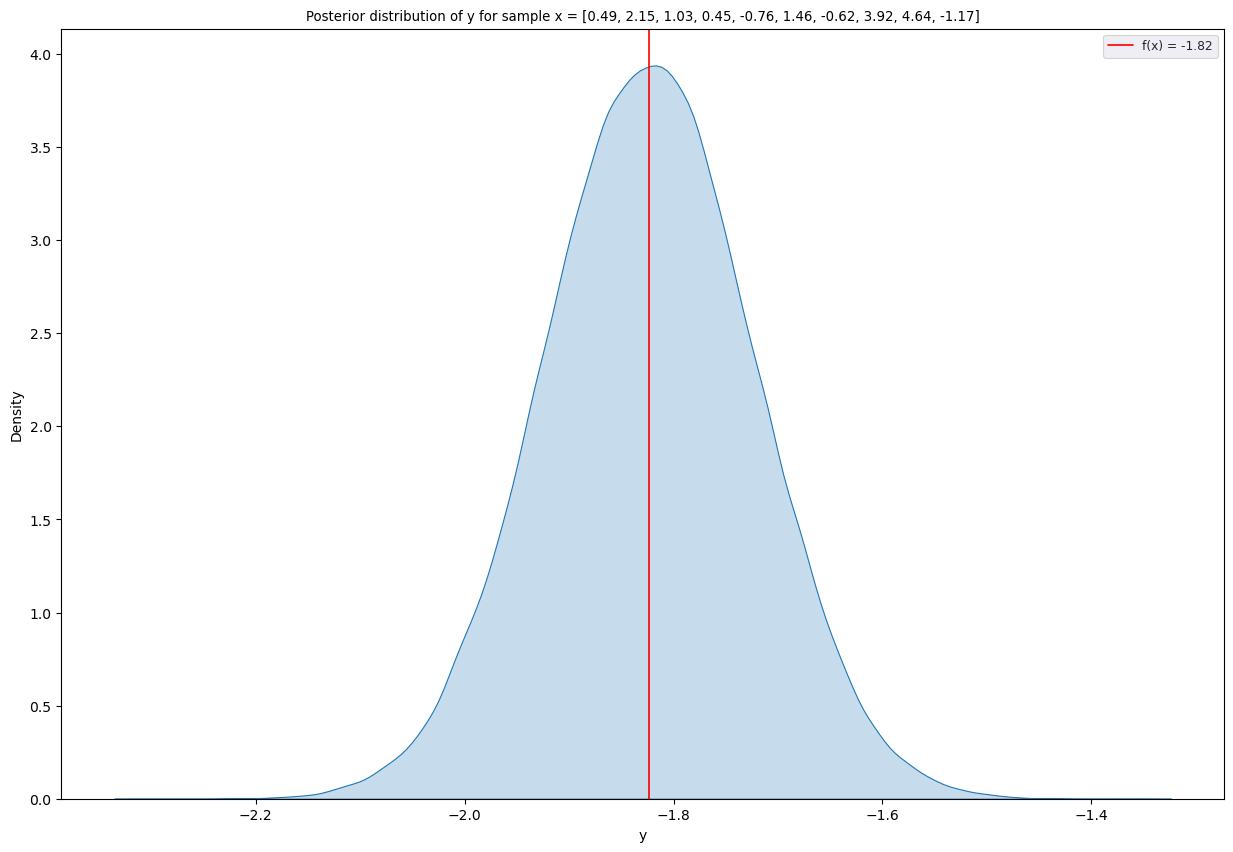

In [6]:
if GENERATE:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [7]:
if TRAIN:
    if not os.path.exists(f"{BASE_DIR}/models"):
        os.mkdir(f"{BASE_DIR}/models")

    bnn, train_stats = train.train(config, dataset_config, f"{BASE_DIR}")

test-shape:  (1000, 11)
torch.Size([1000, 10]) torch.Size([1000, 1])
torch.Size([512, 10]) torch.Size([512, 1])
Sequential(
  (0): Linear(in_features=10, out_features=1024, bias=True)
  (1): ReLU()
  (2): Sequential(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=1024, out_features=1, bias=True)
)
train size: 100000
Using device: cuda:7
===== Training profile sin-10x =====
[0:00:04.408818] epoch: 0 | elbo: 7333851407.67347 | val_rmse: 29.339982986450195 | val_ll: -6.633634567260742
[0:05:48.952927] epoch: 100 | elbo: 38659987.14285714 | val_rmse: 4.494235038757324 | val_ll: -4.41204309463501
[0:11:36.420538] epoch: 200 | elbo: 9640055.635204082 | val_rmse: 2.0369949340820312 | val_ll: -6.008870601654053
[0:17:19.849990] epoch: 300 | elbo: 6951213.132653061 | val_rmse: 1.5139669179916382 | val_ll: -10.478490829467773
[0:22:59.608655] epoch: 400 | elbo: 8129932.5637755105 | val_rmse: 1.1869388818740845 | val_ll: -9.6391286849

test-shape:  (1000, 11)
torch.Size([1000, 10]) torch.Size([1000, 1])
using device: cuda:7
====== evaluating profile sin-10x ======
data samples:  (1000, 100)


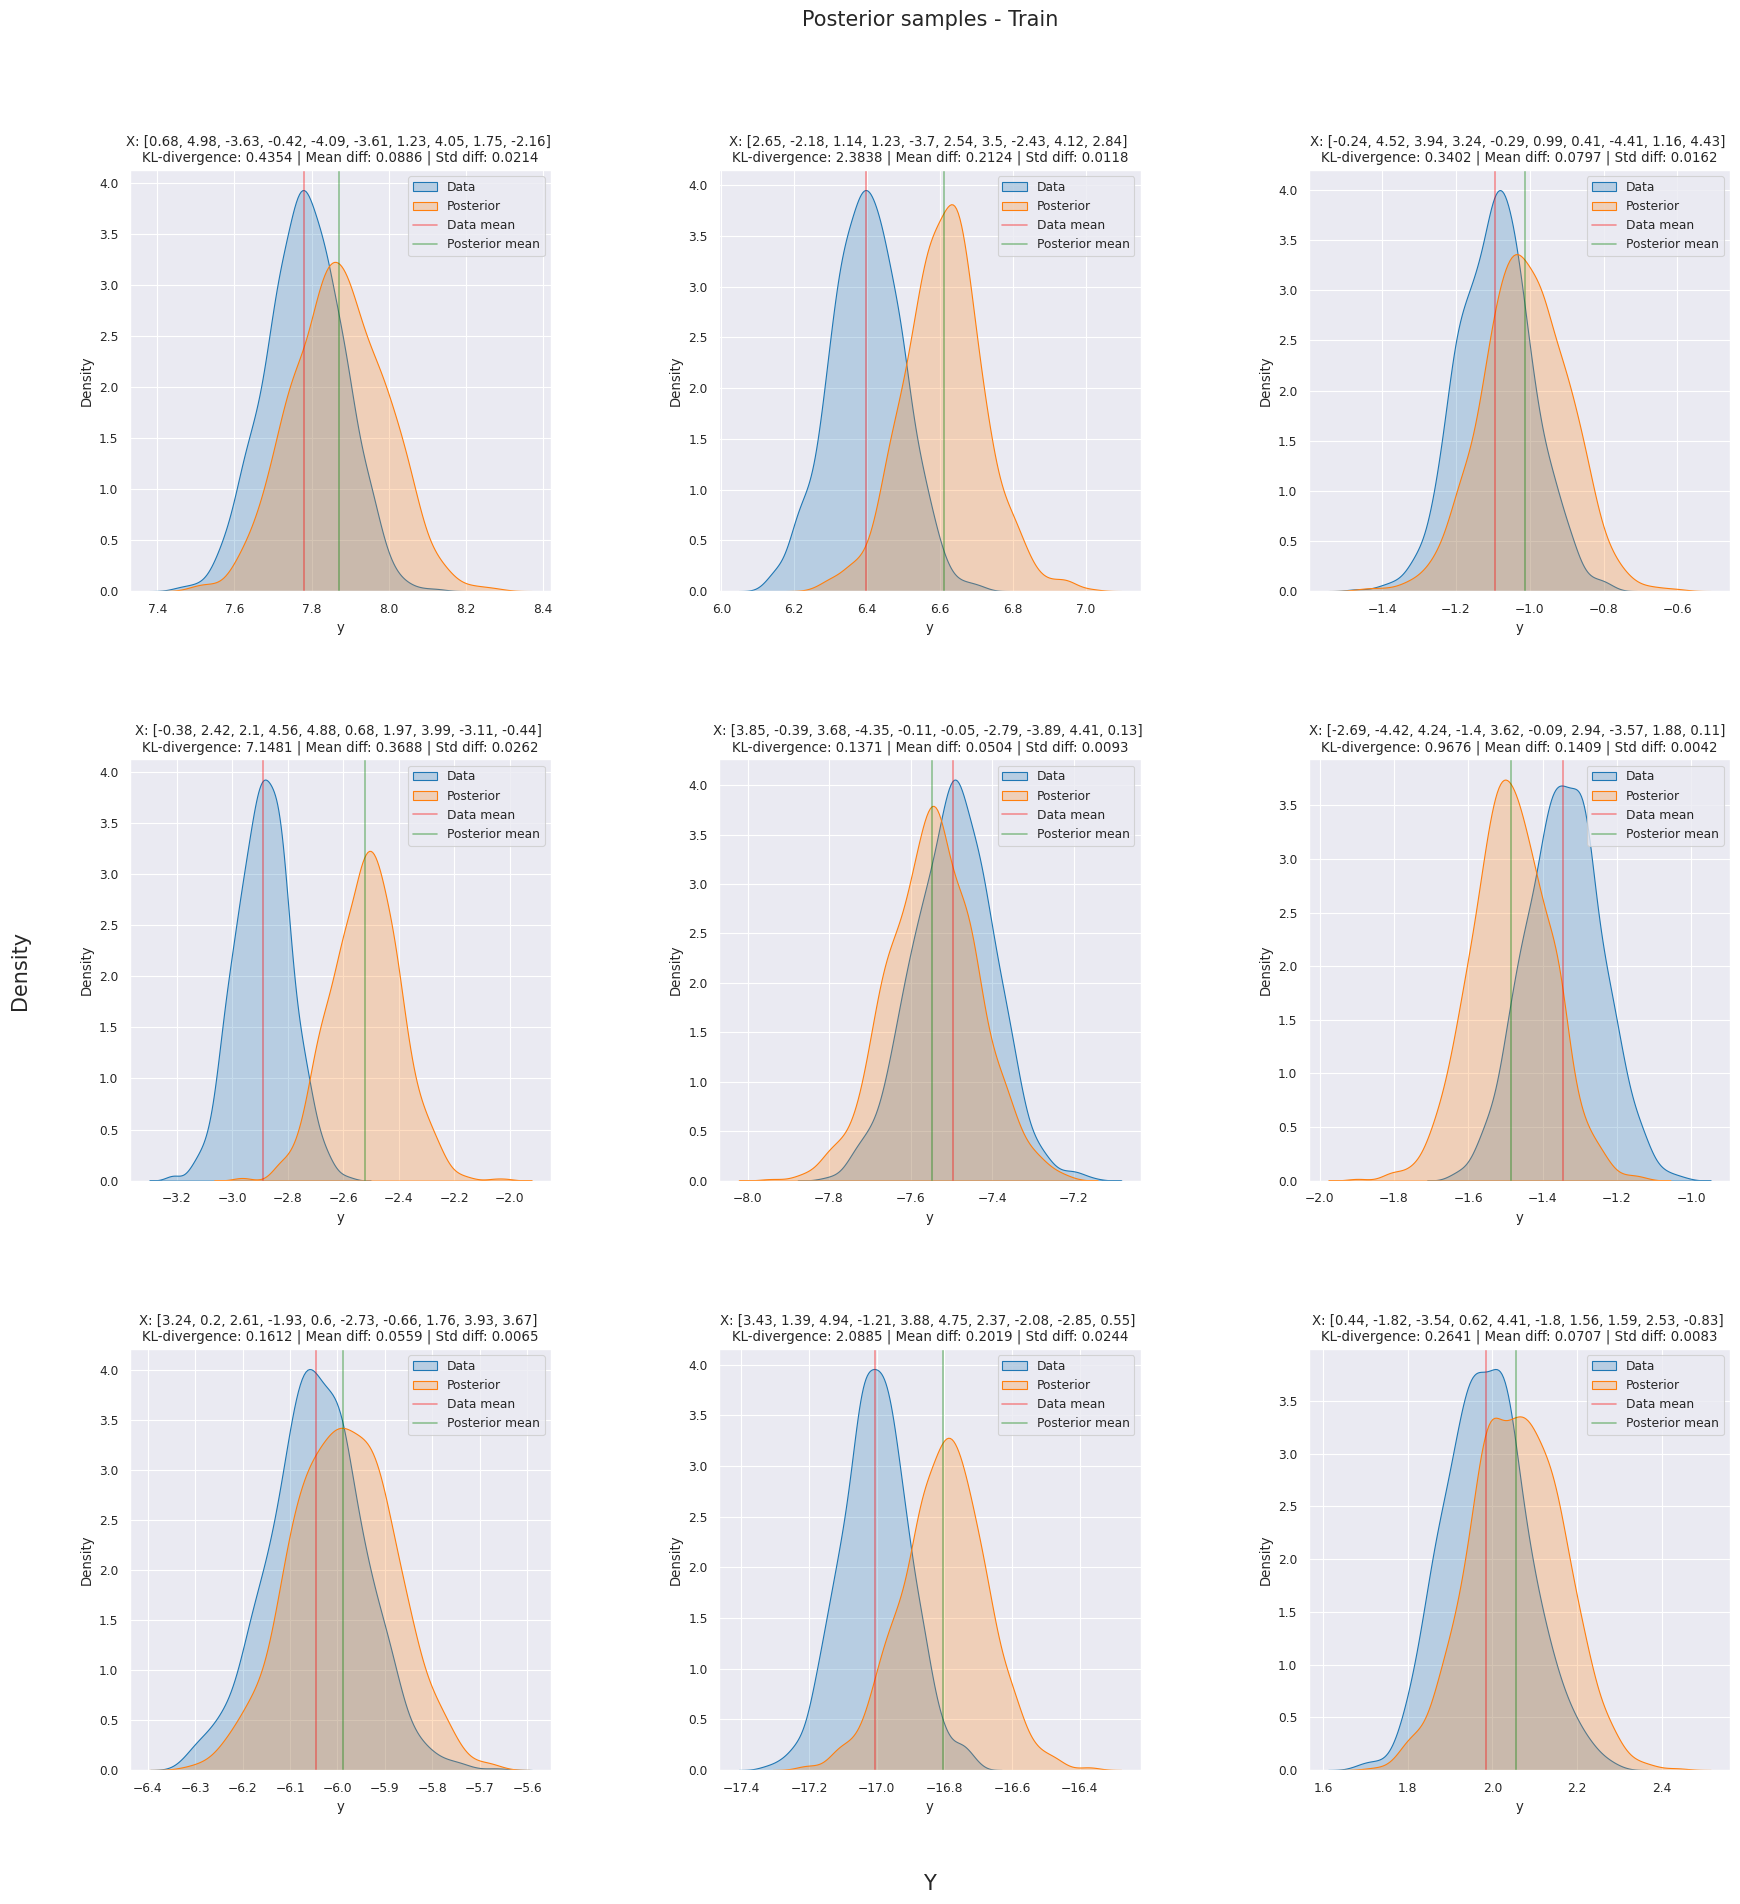

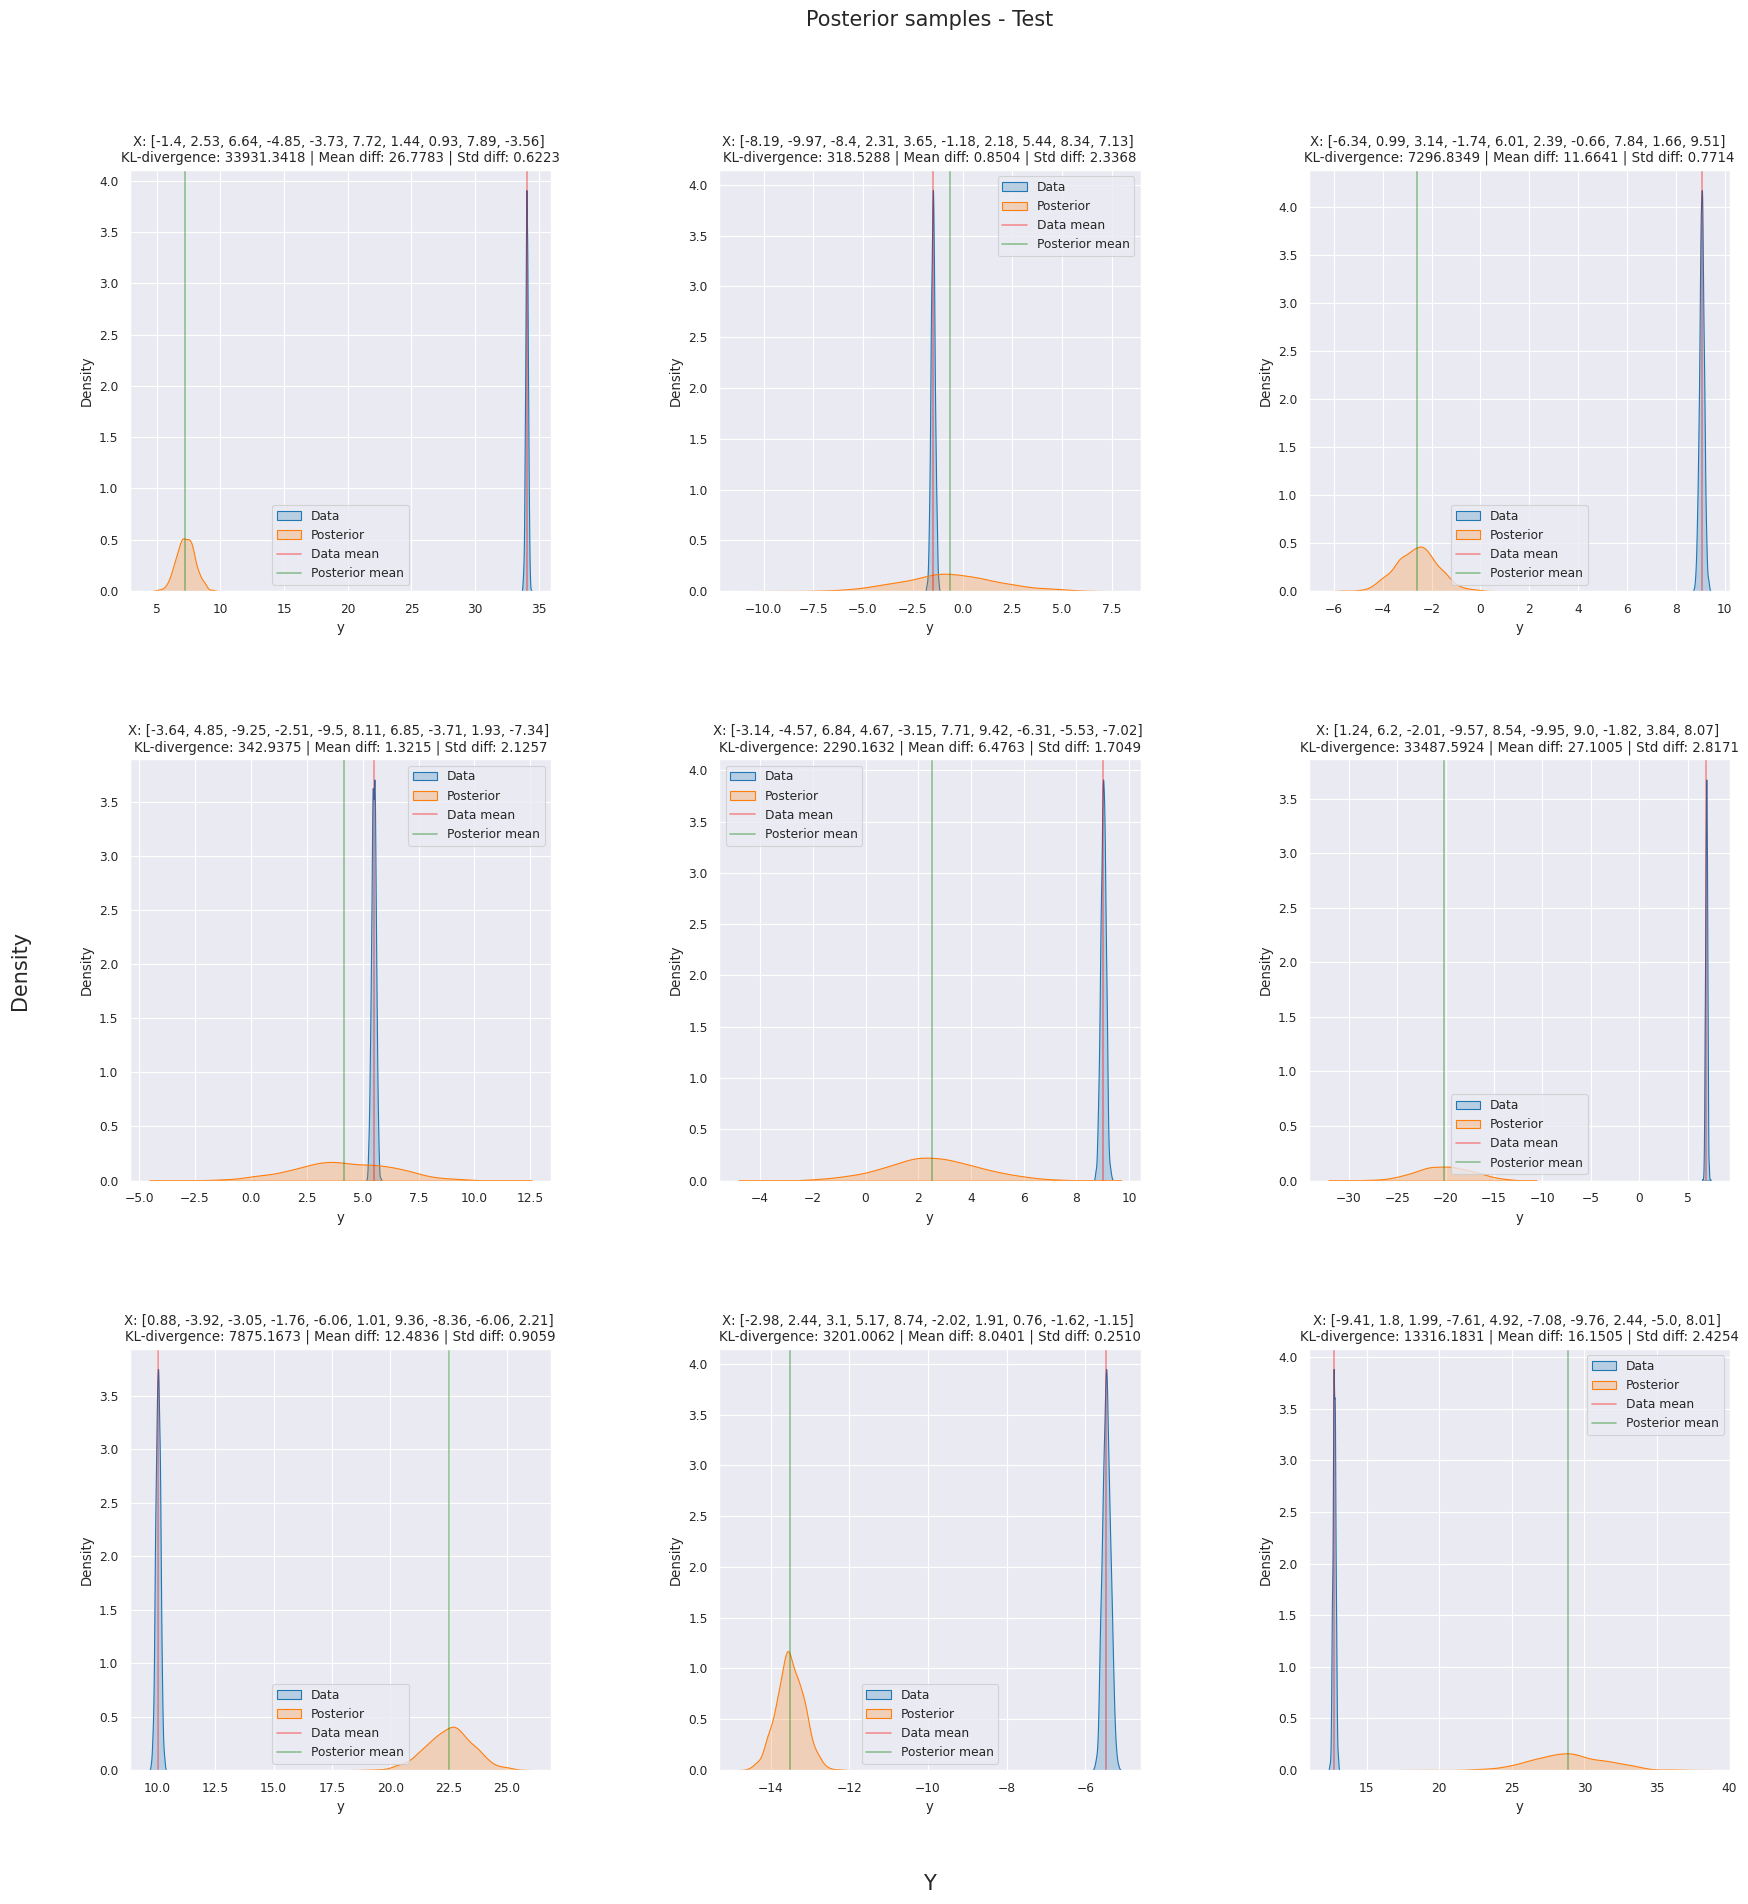

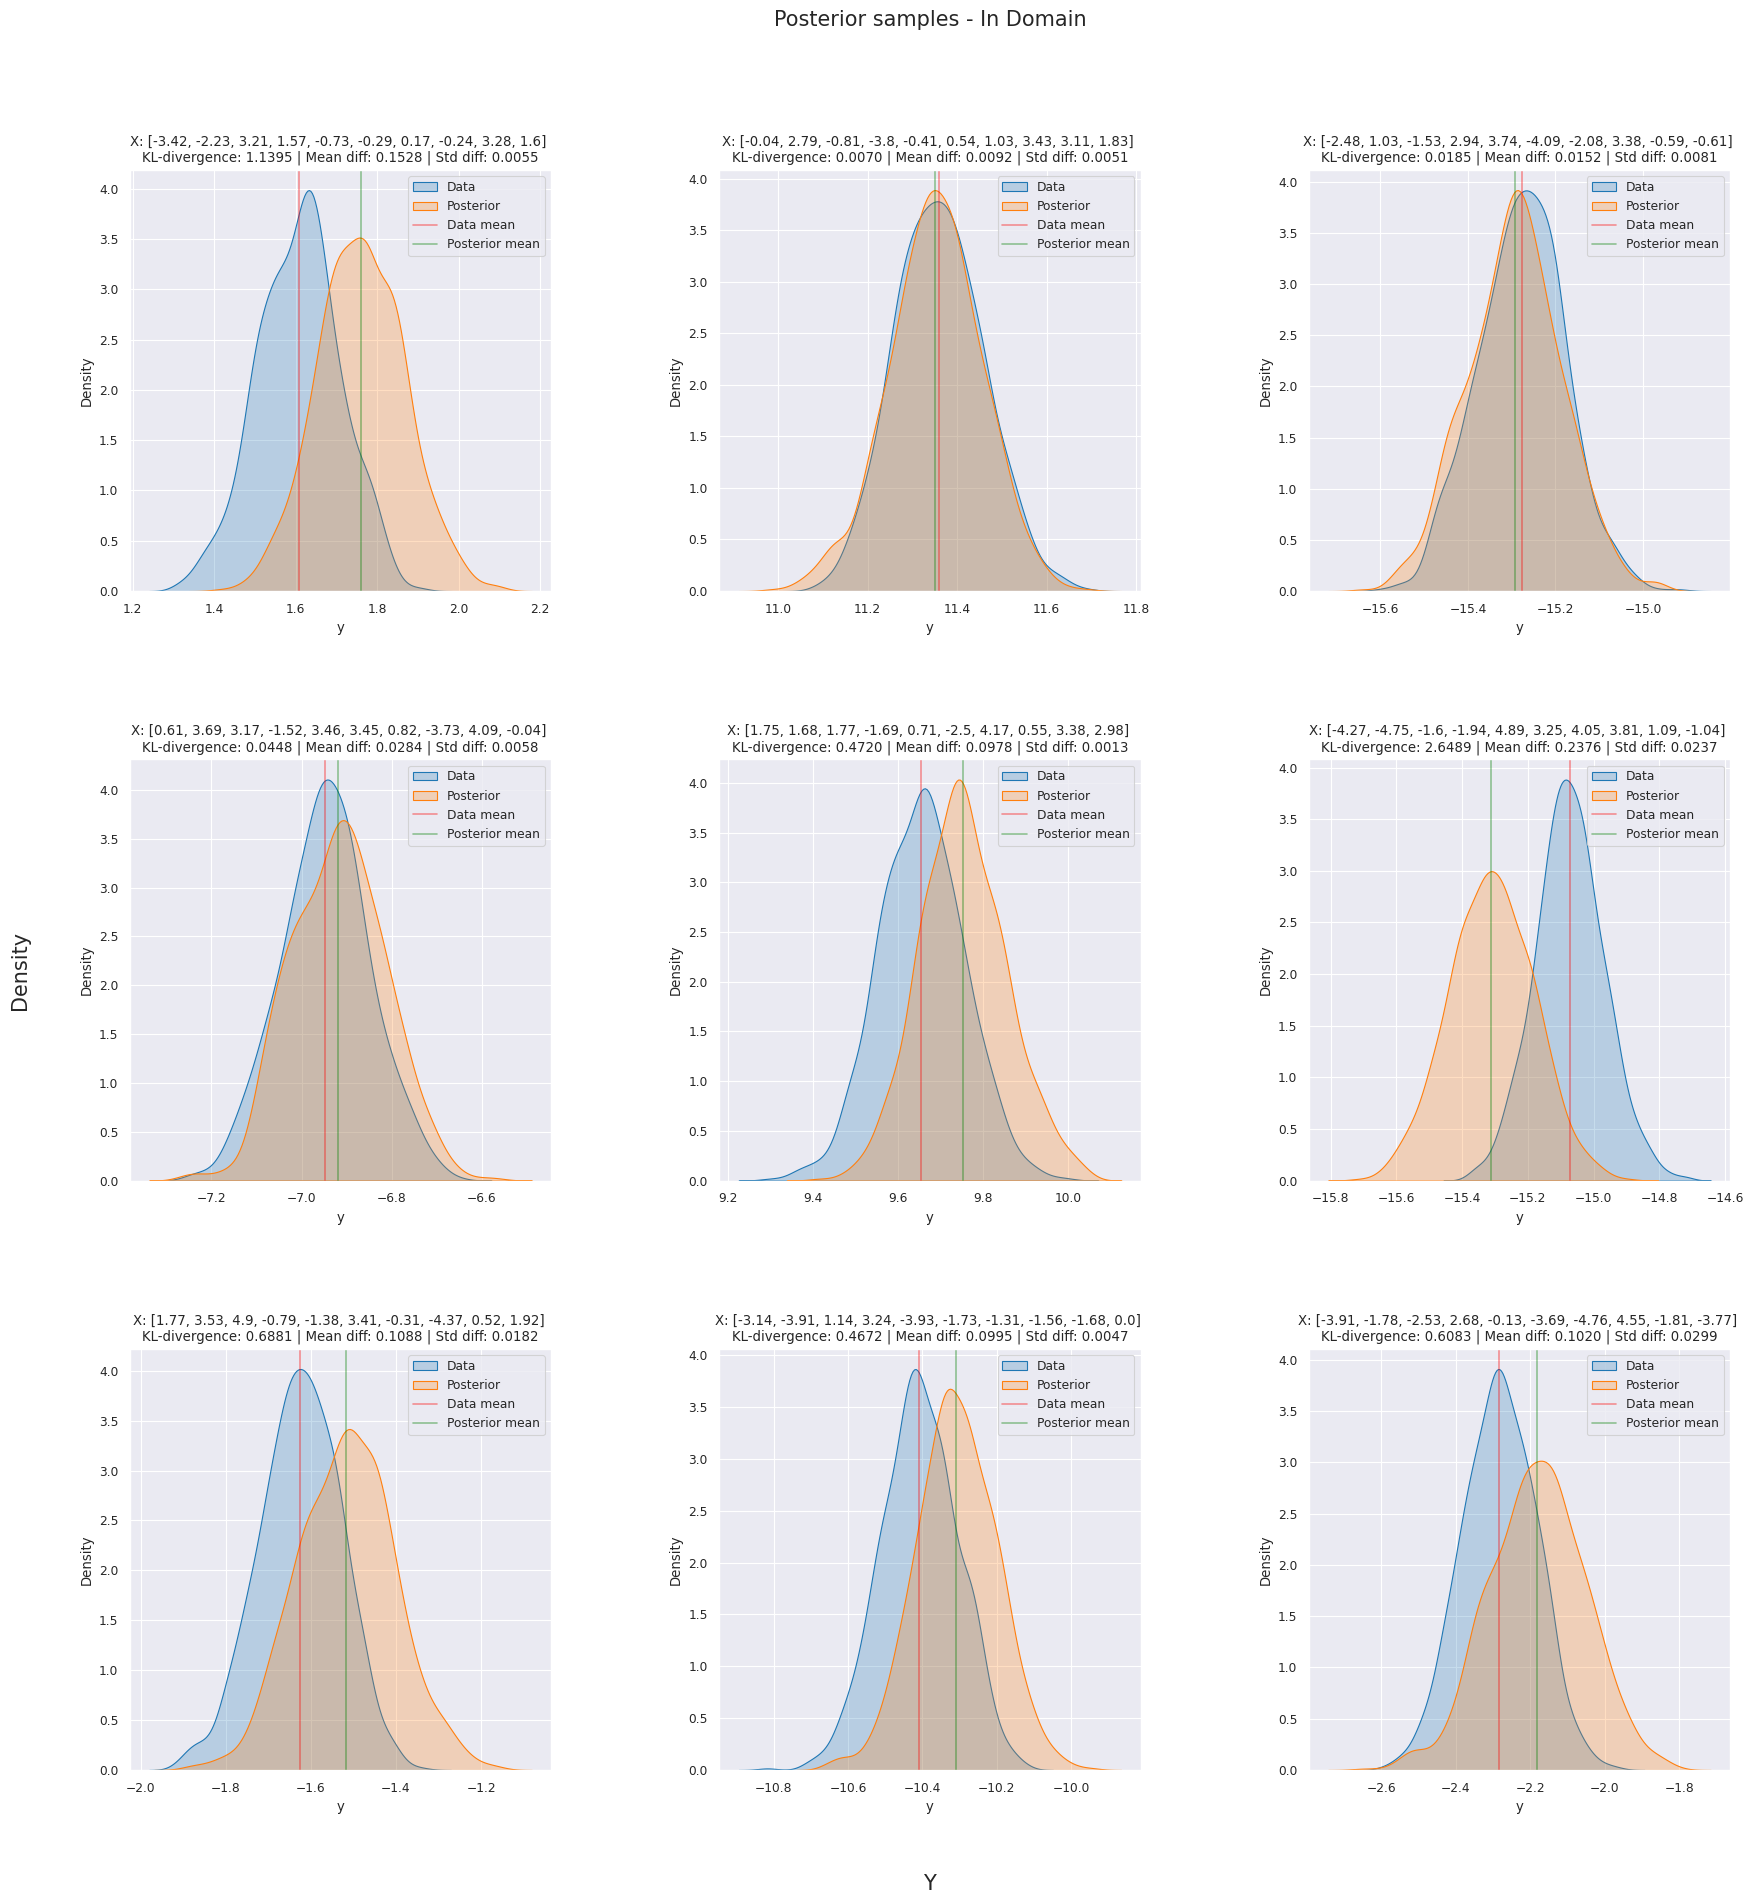

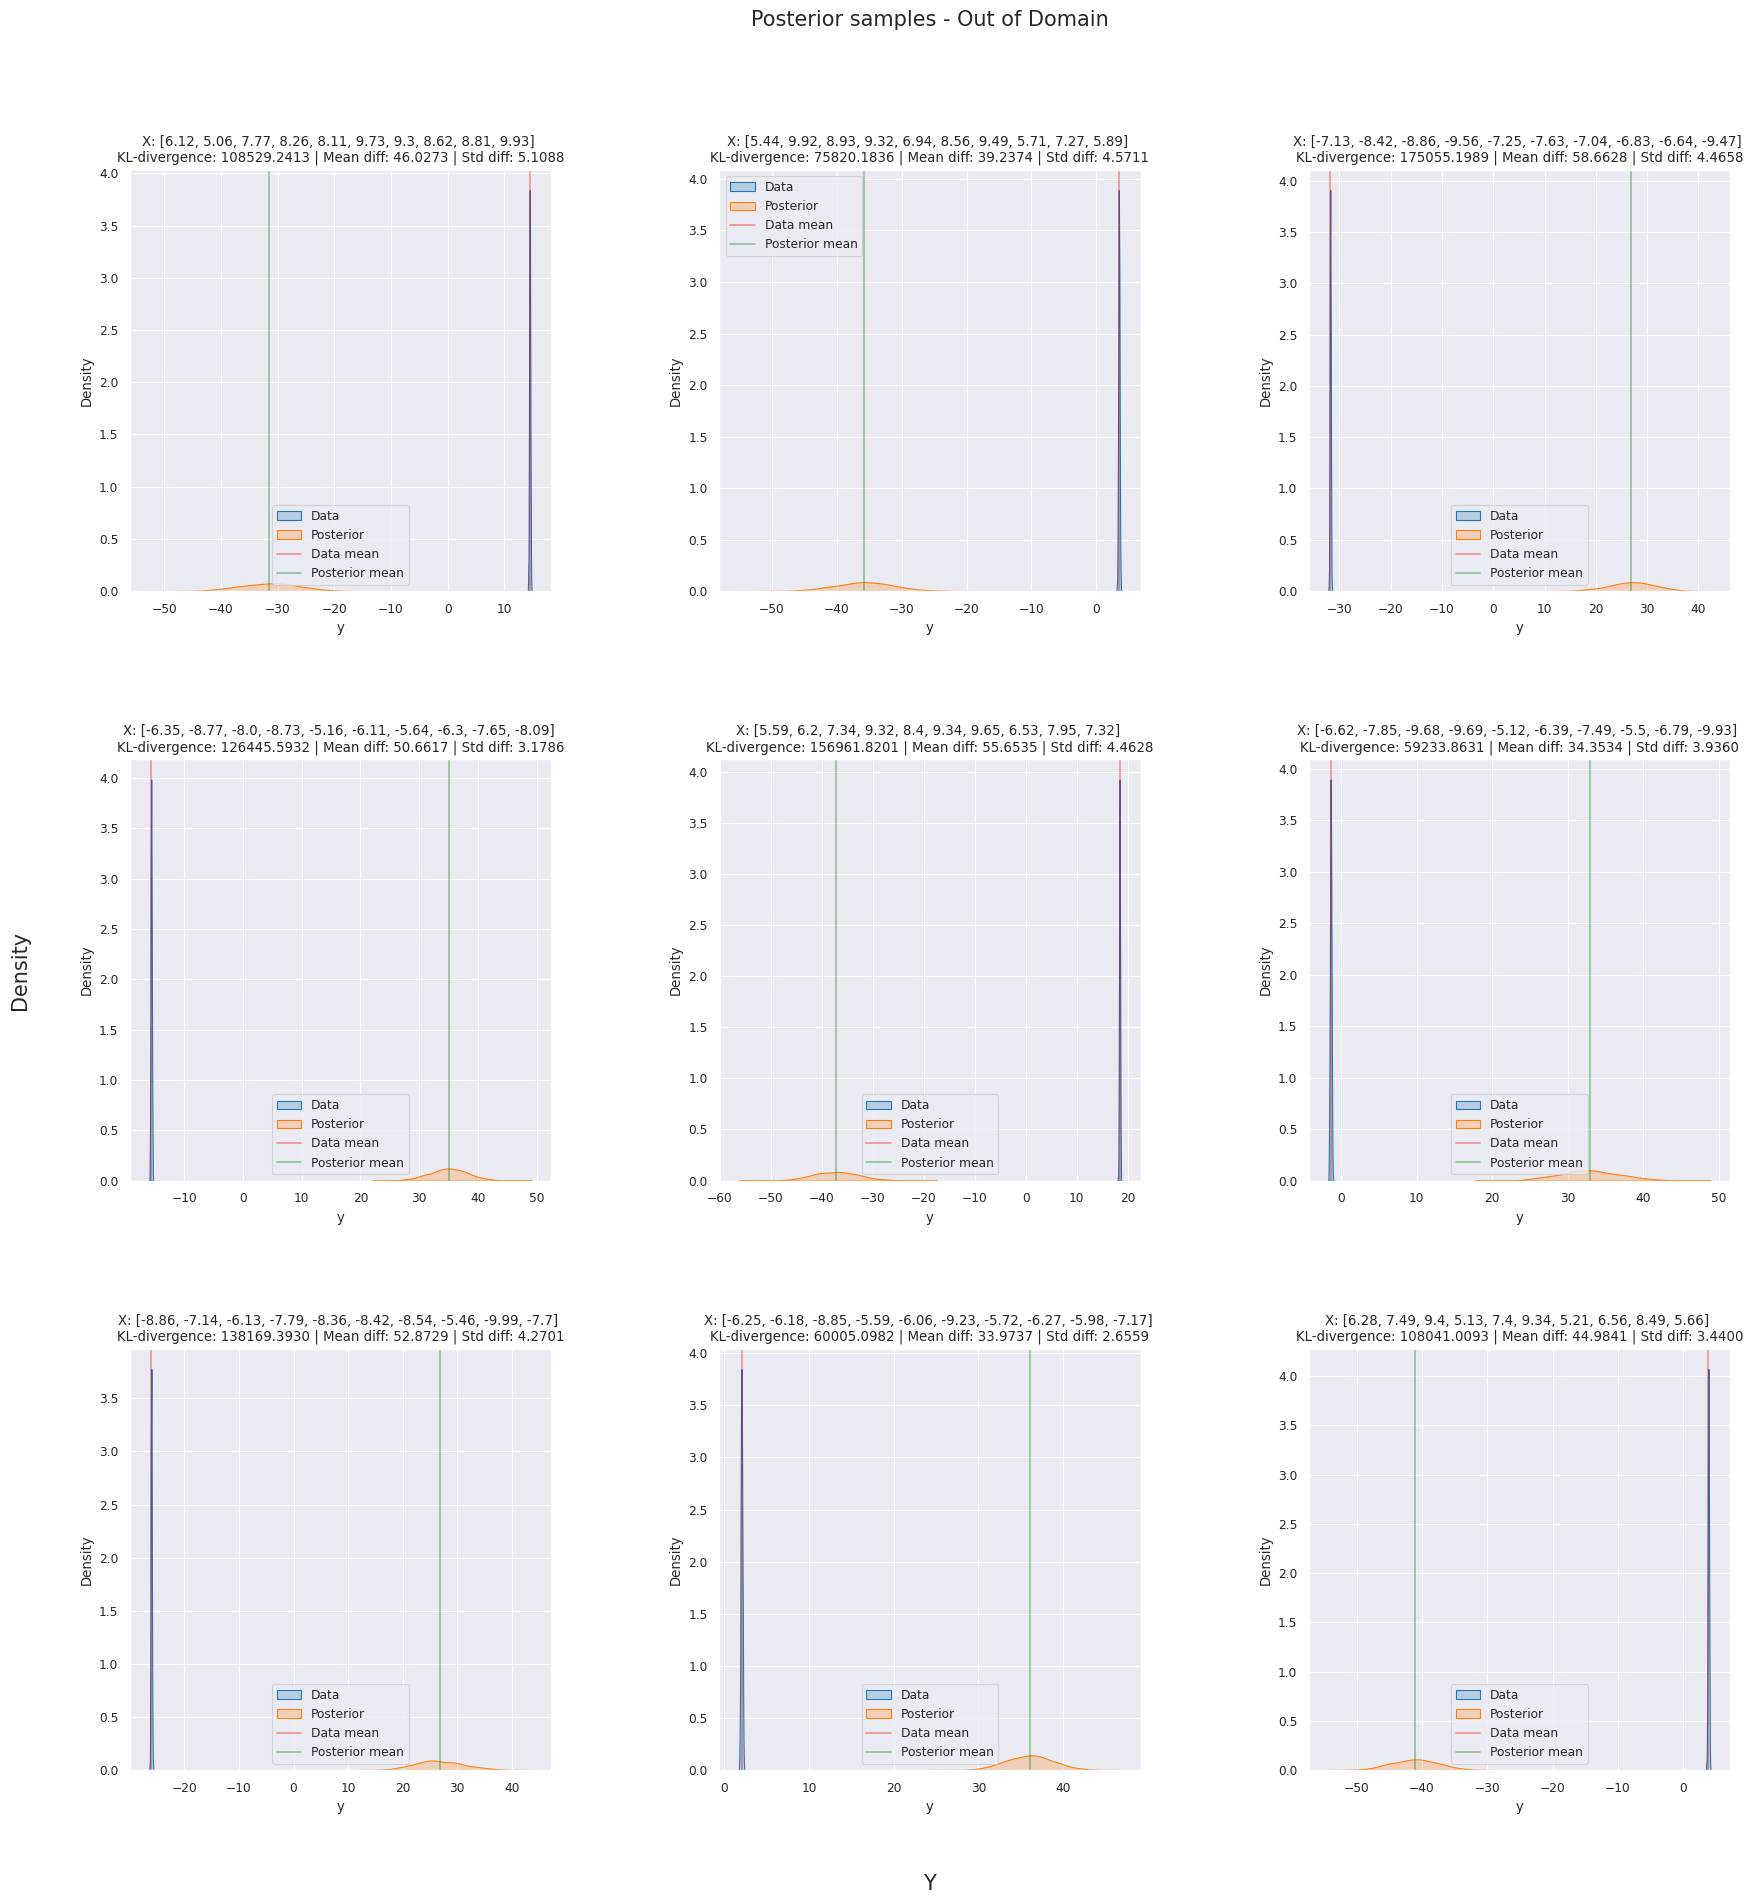

Eval done in 0:00:22.733102


In [8]:
if EVAL:
    if not os.path.exists(f"{BASE_DIR}/results"):
                os.mkdir(f"{BASE_DIR}/results")
                
    eval.eval(config, dataset_config, f"{BASE_DIR}", bnn=bnn)